# Logistic Regression

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability. In other words, given some inpuot parameters we would like to predict if a given data point belongs to a certain class. This problem is similar to linear regression, as the line or curve we are trying to fit here is nothing but the decision boundary.

The sample problem goes as follows: We would like to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through two tests to ensure it is functioning correctly.
From these two tests, we would like to determine whether the microchips should be accepted or rejected. The data can be seen below:

In [288]:
import numpy as np

pwd = %pwd
pwd = pwd.replace("Notebooks", "")
raw_data = np.genfromtxt( pwd + 'Data\\ex2data2.txt', delimiter=',')

X = raw_data[:, 0:2].astype(np.float64)
y = np.array(raw_data[:, 2]).reshape(len(raw_data), 1).astype(np.float64)

<IPython.core.display.Javascript object>


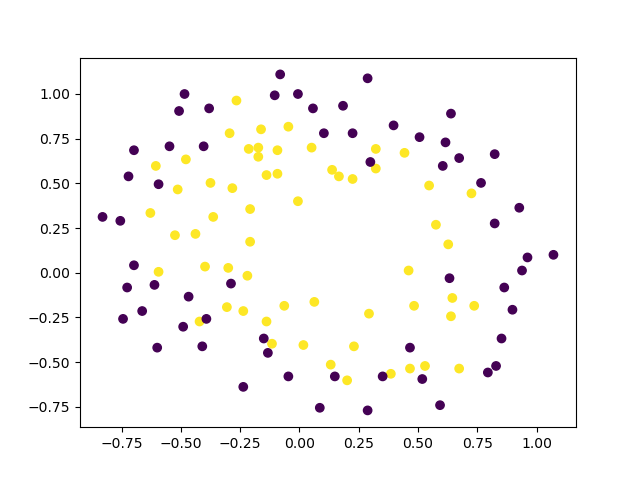

In [289]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.scatter(X[:,0], X[:,1],c=y[:,0])
plt.show()

As we can see no linear equation would really do justice for this dataset. In order to achive get a curve, let us map the input parameters to some higher powers.

In [290]:
def map_features(X):
    non_lin_X = np.zeros((len(X), 10))
    feature1 = X[:, 0:1]
    feature2 = X[:, 1:2]
    
    non_lin_X[:, 0:1] = np.ones((len(X), 1))
    non_lin_X[:, 1:2] = feature1
    non_lin_X[:, 2:3] = feature2

    non_lin_X[:, 3:4] = feature1**2
    non_lin_X[:, 4:5] = feature2**2
    non_lin_X[:, 5:6] = np.multiply(feature1, feature2)

    non_lin_X[:, 6:7] = feature1**3
    non_lin_X[:, 7:8] = feature2**3
    non_lin_X[:, 8:9] = np.multiply(feature1 ** 2, feature2)
    non_lin_X[:, 9:10] = np.multiply(feature1, feature2 ** 2)
    
    return non_lin_X

X = map_features(X)
n, m = X.shape
theta = np.zeros((m))

But now we have given our model too much freedom to fit to our training data. In order to discourage this, we will penalise overfitting by introducing regularization.

Furthermore, we need to redefine our cost function for logistic regression. Take: 
$$$$
$$ J(\theta) =  \frac{1}{m} [-y^T \; log(sigmoid(X \theta))\; - (\mathbb{1} - y)^Tlog(1 - sigmoid(X \theta)) ]$$

Where $m$ is the batch size, $log$ is the natural logarithm and $\mathbb{1}$ is the appropriate sized vector of $1$s. Moreover, any function over an array is defined element-wise. Having redefined the cost function we can now add the penalising terms:

$$ J(\theta) =  \frac{1}{m} [-y^T \; log(sigmoid(X \theta))\; - (\mathbb{1} - y)^Tlog(1 - sigmoid(X \theta)) ] + \frac{\lambda}{2m} \theta^T \theta$$

Note that for compactness we will omit the standard of not penalising $\theta_0$.

In [291]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def regularized_cost_function(theta, X, y, lam):
    m = len(X)
    first_term = np.dot(-y.T, np.log(sigmoid(np.dot(X, theta))))
    second_term = np.dot((1-y).T, np.log(1 - sigmoid(np.dot(X, theta))))
    penalty = (lam/(2*m)) * np.dot(theta.T, theta)

    cost = ((first_term - second_term) / m) + penalty 
    return cost

Despite of the non-linear nature and complexity of the cost function, the gradient is fairly simple and is as follows: 
$$$$
$$ \nabla J(\theta) = X^T \; (sigmoid(X\theta) - y) + \frac{\lambda}{m}\theta$$

In [292]:
def regularized_gradient(theta, X, y, lam):
    m = len(X)
    first_term = np.dot(X.T, (sigmoid(np.dot(X, theta)) - y))
    penalty = (lam / m) * theta

    gradient = (first_term / m) + penalty.reshape(len(first_term), 1)
    return gradient

We will use scipy which offers a great selection of optimizing algorithms, one of wich is called fmin_tnc, which is based on the truncated Newton's algorithm and is efficient in case of many parameters. For this we will need to write a wrapper for the gradient and cost functions, which returns them both.

In [293]:
from scipy import optimize as opt

def cost_with_gradient_regularized(theta, X, y, lam=1):
    # The optimizer wants array-like, but calculations require 2d arrays
    theta = theta.reshape(len(theta), 1)
    return [
        regularized_cost_function(theta, X, y, lam),
        regularized_gradient(theta, X, y, lam),
    ]

result = opt.fmin_tnc(func=cost_with_gradient_regularized, x0=theta, args=(X, y))[0].reshape(len(theta),1)

We can now plot the decision boundary. For this we need to find the contour line, where the height equals 0. Fortunatly, with plotly this can easily be done by:

<IPython.core.display.Javascript object>


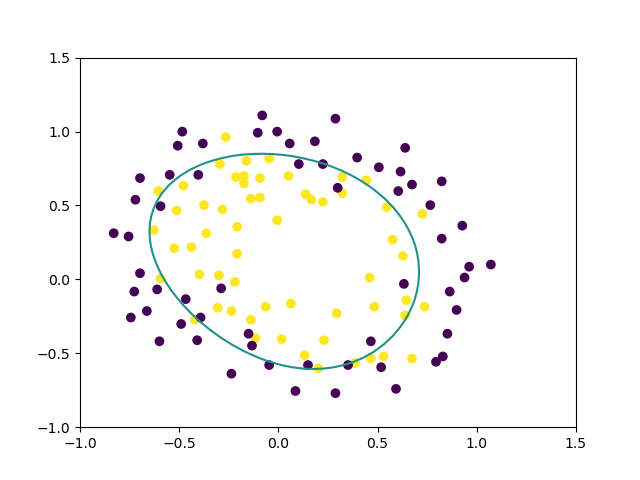

In [313]:
%matplotlib notebook
plt.clf()
plt.cla()
plt.scatter(X[:,1],X[:,2],c=y[:,0])


u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = np.dot(map_features(np.array([u[i], v[j]]).reshape(1, 2)), result)
z = z.T

plt.contour(u, v, z, 0)
plt.show()

As we can see the model gave us a decent fit.